In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/ubuntu/sustaingym


In [2]:
!ls

LICENSE    algo_comp_2021.png  env_norl.yml	 examples   plots
README.md  env.yml	       epsiode_plot.png  notebooks  sustaingym


In [4]:
import os

import numpy as np
import seaborn as sns
import stable_baselines3 as sb3
from tqdm.auto import tqdm

from sustaingym.envs import ElectricityMarketEnv
from sustaingym.envs.battery.plot_utils import *
from sustaingym.envs.battery.wrapped import DiscreteActions
from examples.electricitymarket.run_electricitymarket import *


sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [5]:
env = ElectricityMarketEnv(month='2021-05', seed=215, use_intermediate_rewards=True)
discrete_env = DiscreteActions(env)
reset_seed = 15
seeds = np.arange(30)

## Run offline models

In [6]:
opt_results = run_offline_optimal(seeds, env)
save_results(opt_results, seeds=seeds, path='examples/intermreward/offline_results.npz')

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
opt_results = np.load('examples/intermreward/offline_results.npz')
follow_results = run_follow_offline_optimal(
    seeds, env,
    opt_dispatches=opt_results['dispatch'],
    opt_energies=opt_results['energy'])
save_results(follow_results, seeds=seeds, path='examples/intermreward/follow_offline_results.npz')

  0%|          | 0/30 [00:00<?, ?it/s]

In [8]:
results = run_random(seeds, env, discrete=False)
save_results(results, seeds=seeds, path='examples/intermreward/random_results.npz')

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
results = run_random(seeds, discrete_env, discrete=True)
save_results(results, seeds=seeds, path='examples/intermreward/random_discrete_results.npz')

  0%|          | 0/30 [00:00<?, ?it/s]

## Train RL Models

In [ ]:
# PPO Models

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2019 -v 2021 -a -i -m PPO -l 0.003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2019 -v 2021 -a -i -m PPO -l 0.0003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2019 -v 2021 -a -i -m PPO -l 3e-05 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2021 -a -i -m PPO -l 0.003 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2021 -a -i -m PPO -l 0.0003 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2021 -a -i -m PPO -l 3e-05 -o examples/intermreward



# Trained on year 2019 data (evaluating on year 2021 data during training phase) with discrete actions, saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2019 -v 2021 -d -a -i -m PPO -l 0.003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with discrete actions, saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2019 -v 2021 -d -a -i -m PPO -l 0.0003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with discrete actions, saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2019 -v 2021 -d -a -i -m PPO -l 3e-05 -o examples/intermreward

# Trained on year 2021 data with discrete actions, saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2021 -d -a -i -m PPO -l 0.003 -o examples/intermreward

# Trained on year 2021 data with discrete actions, saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2021 -d -a -i -m PPO -l 0.0003 -o examples/intermreward

# Trained on year 2021 data with discrete actions, saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2021 -d -a -i -m PPO -l 3e-05 -o examples/intermreward

In [ ]:
# SAC Models

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2019 -v 2021 -a -i -m SAC -l 0.003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2019 -v 2021 -a -i -m SAC -l 0.0003 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2019 -v 2021 -a -i -m SAC -l 3e-05 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.003
%run examples/train -y 2021 -a -i -m SAC -l 0.003 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.0003
%run examples/train -y 2021 -a -i -m SAC -l 0.0003 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 3e-05
%run examples/train -y 2021 -a -i -m SAC -l 3e-05 -o examples/intermreward

In [ ]:
# DQN Models

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.001
%run examples/train -y 2019 -v 2021 -d -a -i -m DQN -l 0.001 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 0.0001
%run examples/train -y 2019 -v 2021 -d -a -i -m DQN -l 0.0001 -o examples/intermreward

# Trained on year 2019 data (evaluating on year 2021 data during training phase) with saved actions, intermediate rewards, and learning rate of 1e-05
%run examples/train -y 2019 -v 2021 -d -a -i -m DQN -l 1e-05 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.001
%run examples/train -y 2021 -d -a -i -m DQN -l 0.001 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 0.0001
%run examples/train -y 2021 -d -a -i -m DQN -l 0.0001 -o examples/intermreward

# Trained on year 2021 data with saved actions, intermediate rewards, and learning rate of 1e-5
%run examples/train -y 2021 -d -a -i -m DQN -l 1e-05 -o examples/intermreward

## Run RL Models

In [ ]:
# determine best PPO 2019 model
for model_name in ['PPO_2019_g0.9999_lr0.003', 'PPO_2019_g0.9999_lr0.0003', 'PPO_2019_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2019/evaluations.npz'
    npz = np.load(evals_path)
    print("model: ", model_name)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best PPO 2021 model
for model_name in ['PPO_2021_g0.9999_lr0.003', 'PPO_2021_g0.9999_lr0.0003', 'PPO_2021_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2021/evaluations.npz'
    npz = np.load(evals_path)
    print("model: ", model_name)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best PPO discrete 2019 model
for model_name in ['PPO_discrete_2019_g0.9999_lr0.003', 'PPO_discrete_2019_g0.9999_lr0.0003', 'PPO_discrete_2019_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2019/evaluations.npz'
    npz = np.load(evals_path)
    print("model: ", model_name)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best PPO discrete 2021 model
for model_name in ['PPO_discrete_2021_g0.9999_lr0.003', 'PPO_discrete_2021_g0.9999_lr0.0003', 'PPO_discrete_2021_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2021/evaluations.npz'
    npz = np.load(evals_path)
    print("model: ", model_name)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best SAC 2019 model
for model_name in ['SAC_2019_g0.9999_lr0.003', 'SAC_2019_g0.9999_lr0.0003', 'SAC_2019_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2019/evaluations.npz'
    npz = np.load(evals_path)
    print("model: ", model_name)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best SAC 2021 model
for model_name in ['SAC_2021_g0.9999_lr0.003', 'SAC_2021_g0.9999_lr0.0003', 'SAC_2021_g0.9999_lr3e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2021/evaluations.npz'
    npz = np.load(evals_path)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best DQN 2019 model
for model_name in ['DQN_discrete_2019_g0.9999_lr0.001', 'DQN_discrete_2019_g0.9999_lr0.0001', 'DQN_discrete_2019_g0.9999_lr1e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2019/evaluations.npz'
    npz = np.load(evals_path)
    print(npz['results'].mean(axis=1).max())

In [ ]:
# determine best DQN 2021 model
for model_name in ['DQN_discrete_2021_g0.9999_lr0.001', 'DQN_discrete_2021_g0.9999_lr0.0001', 'DQN_discrete_2021_g0.9999_lr1e-05']:
    evals_path = f'examples/intermreward/{model_name}/eval2021/evaluations.npz'
    npz = np.load(evals_path)
    print(npz['results'].mean(axis=1).max())

In [ ]:
ppo2019_model_dir = 'examples/intermreward/PPO_2019_g0.9999_lr0.0003/'
ppo2021_model_dir = 'examples/intermreward/PPO_2021_g0.9999_lr0.0003/'
ppodiscrete2019_model_dir = 'examples/intermreward/PPO_discrete_2019_g0.9999_lr0.0003/'
ppodiscrete2021_model_dir = 'examples/intermreward/PPO_discrete_2021_g0.9999_lr0.0003/'
sac2019_model_dir = 'examples/intermreward/SAC_2019_g0.9999_lr3e-05/'
sac2021_model_dir = 'examples/intermreward/SAC_2021_g0.9999_lr0.0003/'
dqn2019_model_dir = 'examples/intermreward/DQN_discrete_2019_g0.9999_lr1e-05/'
dqn2021_model_dir = 'examples/intermreward/DQN_discrete_2021_g0.9999_lr0.0001/'

In [ ]:
ppo2019 = sb3.PPO.load(os.path.join(ppo2019_model_dir, 'eval2019/best_model.zip'))
results = run_model(ppo2019, seeds=seeds, env=env, discrete=False)
save_results(results, seeds=seeds, path=os.path.join(ppo2019_model_dir, 'eval2021/results.npz'))

In [ ]:
ppo2021 = sb3.PPO.load(os.path.join(ppo2021_model_dir, 'eval2021/best_model.zip'))
results = run_model(ppo2021, seeds=seeds, env=env, discrete=False)
save_results(results, seeds=seeds, path=os.path.join(ppo2021_model_dir, 'eval2021/results.npz'))

In [ ]:
ppodiscrete2019 = sb3.PPO.load(os.path.join(ppodiscrete2019_model_dir, 'eval2019/best_model.zip'))
results = run_model(ppodiscrete2019, seeds=seeds, env=discrete_env, discrete=True)
save_results(results, seeds=seeds, path=os.path.join(ppodiscrete2019_model_dir, 'eval2021/results.npz'))

In [ ]:
ppodiscrete2021 = sb3.PPO.load(os.path.join(ppodiscrete2021_model_dir, 'eval2021/best_model.zip'))
results = run_model(ppodiscrete2021, seeds=seeds, env=discrete_env, discrete=True)
save_results(results, seeds=seeds, path=os.path.join(ppodiscrete2021_model_dir, 'eval2021/results.npz'))

In [ ]:
sac2019 = sb3.SAC.load(os.path.join(sac2019_model_dir, 'eval2019/best_model.zip'))
results = run_model(sac2019, seeds=seeds, env=env, discrete=False)
save_results(results, seeds=seeds, path=os.path.join(sac2019_model_dir, 'eval2021/results.npz'))

In [ ]:
sac2021 = sb3.SAC.load(os.path.join(sac2021_model_dir, 'model.zip'))
results = run_model(sac2021, seeds=seeds, env=env, discrete=False)
save_results(results, seeds=seeds, path=os.path.join(sac2021_model_dir, 'eval2021/results.npz'))

In [ ]:
dqn2019 = sb3.DQN.load(os.path.join(dqn2019_model_dir, 'eval2019/best_model.zip'))
results = run_model(dqn2019, seeds=seeds, env=discrete_env, discrete=True)
save_results(results, seeds=seeds, path=os.path.join(dqn2019_model_dir, 'eval2021/results.npz'))

In [ ]:
dqn2021 = sb3.DQN.load(os.path.join(dqn2021_model_dir, 'model.zip'))
results = run_model(dqn2021, seeds=seeds, env=discrete_env, discrete=True)
save_results(results, seeds=seeds, path=os.path.join(dqn2021_model_dir, 'eval2021/results.npz'))

## Read results and make plots

In [4]:
results_paths = {
    'oracle': 'examples/intermreward/offline_results.npz',
    'follow oracle': 'examples/intermreward/follow_offline_results.npz',
    'rand': 'examples/intermreward/random_results.npz',
    'rand discrete': 'examples/intermreward/random_discrete_results.npz',

    'PPO (2019)': os.path.join(ppo2019_model_dir, 'eval2021/results.npz'),
    'PPO (2021)': os.path.join(ppo2021_model_dir, 'eval2021/results.npz'),
    'PPO discrete (2019)': os.path.join(ppodiscrete2019_model_dir, 'eval2021/results.npz'),
    'PPO discrete (2021)': os.path.join(ppodiscrete2021_model_dir, 'eval2021/results.npz'),
    'SAC (2019)': os.path.join(sac2019_model_dir, 'eval2021/results.npz'),
    'SAC (2021)': os.path.join(sac2021_model_dir, 'eval2021/results.npz'),
    'DQN (2019)': os.path.join(dqn2019_model_dir, 'eval2021/results.npz'),
    'DQN (2021)': os.path.join(dqn2021_model_dir, 'eval2021/results.npz')
}

In [5]:
results = {label: np.load(path) for label, path in results_paths.items()}

KeyError: 'results is not a file in the archive'

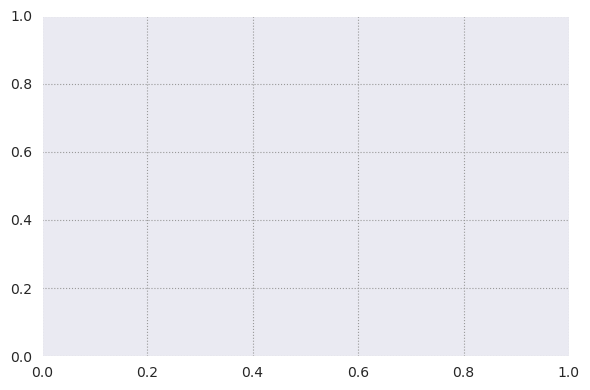

In [7]:
fig, ax = plot_returns(results, ylim=(-16000, 3000))
fig.savefig('plots/em_returns.png', dpi=300, pad_inches=0, bbox_inches='tight')

In [ ]:
seed = 13
ep_data = {}
for label, d in results.items():
    data = {k: d[k][seed] for k in ['rewards', 'prices', 'energy']}
    data['model_name'] = label
    if 'SAC (2021)' in label:
        data['bids'] = d['actions'][seed]
    ep_data[label] = data

In [ ]:
env.reset(seed)
fig, axs, times = setup_episode_plot(env, '2021-05', include_returns=True, include_bids=True)
for label in ['oracle', 'follow oracle', 'rand', 'rand discrete', 'SAC (2021)', 'DQN (2021)', 'PPO discrete (2021)']:
    plot_episode(axs, times, **ep_data[label])

for plot in ['prices', 'energy', 'rewards', 'bids']:
    axs[plot].legend(bbox_to_anchor=(1,1))

In [ ]:
fig.savefig('plots/em_episode.png', dpi=300, pad_inches=0, bbox_inches='tight')